In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/home/marco/.fastai/data/mnist_sample/labels.csv'),Path('/home/marco/.fastai/data/mnist_sample/valid'),Path('/home/marco/.fastai/data/mnist_sample/train')]

In [4]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [5]:
PILImage.create(threes[3])

In [6]:
im3 = Image.open(threes[1])
im3

In [7]:
array(im3)[4:15,4:15]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254],
       [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253],
       [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10],
       [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0],
       [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249],
       [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253],
       [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253],
       [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253],
       [  0,   0,   0,   0,   0,   0,   0,  43,  98,  98, 208]],
      dtype=uint8)

In [8]:
tensor(im3)[4:15,4:15]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253],
        [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253],
        [  0,   0,   0,   0,   0,   0,   0,  43,  98,  98, 208]],
       dtype=torch.uint8)

In [9]:
tens = tensor(im3)
df = pd.DataFrame(tens[4:15,4:25])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greens')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0,0,0,0


In [10]:
seven_tensors = [tensor(Image.open(s)) for s in sevens]
three_tensors = [tensor(Image.open(t)) for t in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

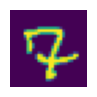

In [11]:
show_image(seven_tensors[2])

In [12]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [13]:
len(stacked_threes.shape)

3

In [14]:
stacked_threes.ndim

3

<Axes: >

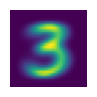

In [15]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

In [16]:
# show_image(stacked_threes.mean(1), figsize=(2,1000))
# show_image(stacked_sevens.mean(2), figsize=(2,1000))

<Axes: >

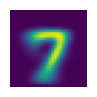

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

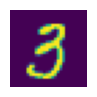

In [18]:
test_three = stacked_threes[10]
show_image(test_three)

In [19]:
def check_number_L1_norm(n: tensor):
    d3 = (n-mean3).abs().mean()
    d7 = (n-mean7).abs().mean()
    if d3 < d7:
        return f"Could be a 3, with a distance of {d3} against {d7}"
    return f"Could be a 7, with a distance of {d7} against {d3}"

In [20]:
check_number_L1_norm(stacked_sevens[100])

'Could be a 7, with a distance of 0.11215893179178238 against 0.12756185233592987'

In [21]:
check_number_L1_norm(stacked_threes[23])

'Could be a 3, with a distance of 0.1150953397154808 against 0.12074664235115051'

In [22]:
failed3 = 0
for t in stacked_threes:
    if check_number_L1_norm(t).startswith("Could be a 7"):
        failed3 = failed3 + 1
failed3

667

In [23]:
failed7 = 0
for s in stacked_sevens:
    if check_number_L1_norm(s).startswith("Could be a 3"):
        failed7 = failed7 + 1
failed7

24

In [24]:
def check_number_L2_norm(n: tensor):
    d3 = ((n - mean3)**2).mean().sqrt()
    d7 = ((n - mean7)**2).mean().sqrt()
    if d3 < d7:
        return f"Could be a 3, with a distance of {d3} against {d7}"
    return f"Could be a 7, with a distance of {d7} against {d3}"

In [65]:
failed3 = 0
for t in stacked_threes:
    if check_number_L2_norm(t).startswith("Could be a 7"):
        failed3 = failed3 + 1
failed3

283

In [66]:
failed7 = 0
for s in stacked_sevens:
    if check_number_L2_norm(s).startswith("Could be a 3"):
        failed7 = failed7 + 1
failed7

106

In [27]:
F.l1_loss(stacked_threes[4], mean3), F.l1_loss(stacked_threes[4], mean7)

(tensor(0.1300), tensor(0.1680))

In [28]:
F.mse_loss(stacked_sevens[22], mean7), F.mse_loss(stacked_sevens[22], mean3)

(tensor(0.0477), tensor(0.0904))

In [69]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [81]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(stacked_threes[12], mean3), mnist_distance(stacked_threes, mean3).mean()

(tensor(0.1286), tensor(0.1313))

In [71]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1142, 0.1162, 0.1143,  ..., 0.1186, 0.1061, 0.1331]),
 torch.Size([1010]))

In [39]:
(stacked_threes-mean3).shape

torch.Size([6131, 28, 28])

In [45]:
tensor([1,2,3]).shape, tensor(1).shape

(torch.Size([3]), torch.Size([]))

In [50]:
(tensor([1,1]) + tensor([[4,5],[6,7],[8,9]]))

tensor([[ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [60]:
(tensor([1,100]) + tensor([[[4,5],[6,7]],[[8,9],[4,5]],[[6,7],[8,9]],[[4,5],[6,7]],[[8,9],[1,2]]]))

tensor([[[  5, 105],
         [  7, 107]],

        [[  9, 109],
         [  5, 105]],

        [[  7, 107],
         [  9, 109]],

        [[  5, 105],
         [  7, 107]],

        [[  9, 109],
         [  2, 102]]])

In [72]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [84]:
tensor([1,1]) < tensor([0,5])

tensor([False,  True])

In [74]:
is_3(valid_3_tens[2]), is_3(valid_3_tens).float().mean()

(tensor(True), tensor(0.9168))

In [85]:
is_3(valid_7_tens[2]), is_3(valid_7_tens).float().mean()

(tensor(False), tensor(0.0146))

In [78]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [ ]:
a